<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


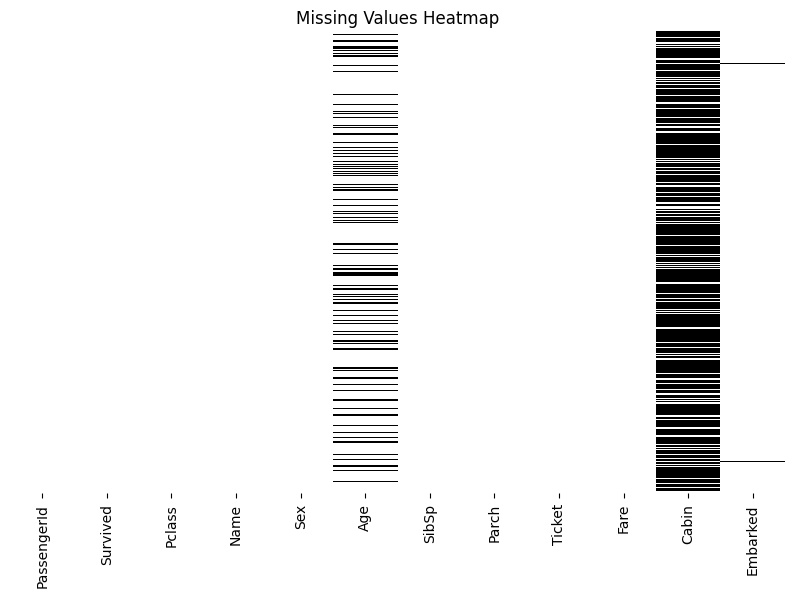

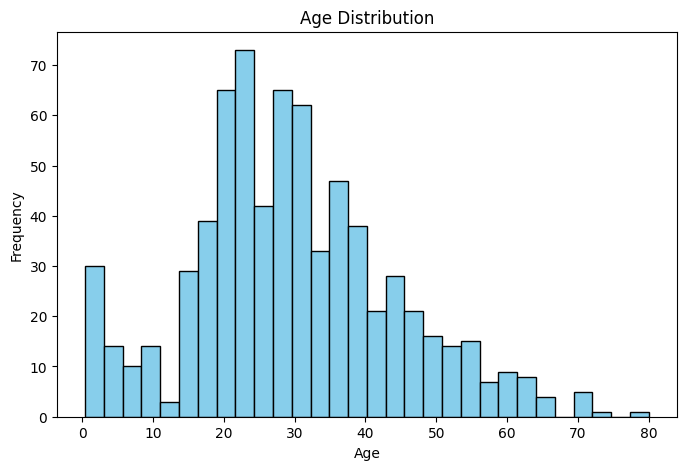

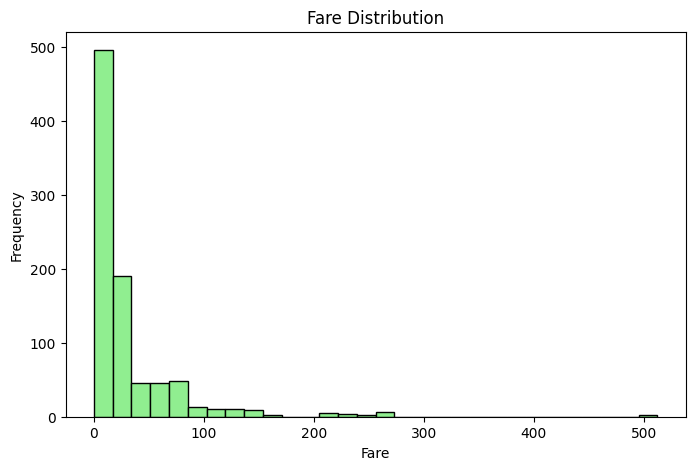

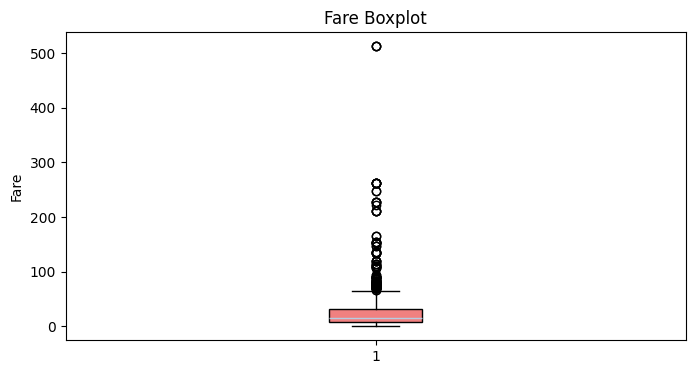

<Figure size 800x500 with 0 Axes>

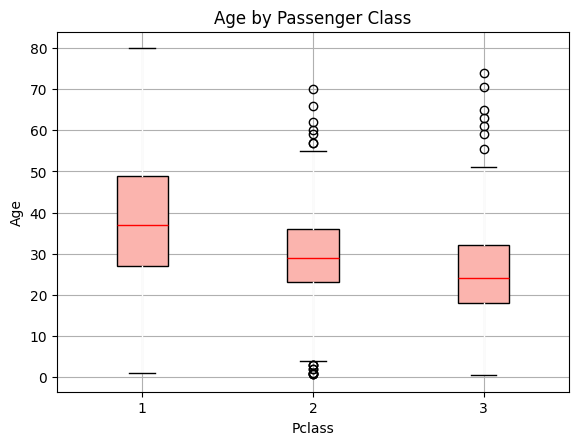

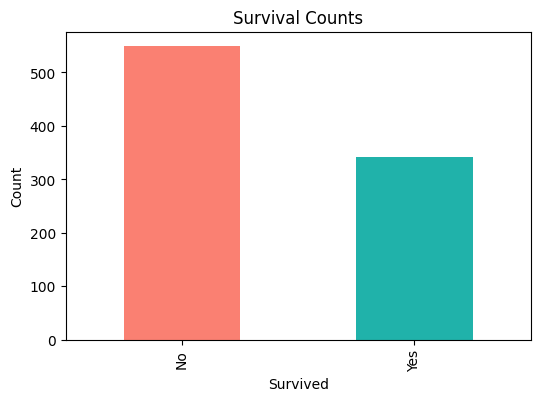

<Figure size 600x400 with 0 Axes>

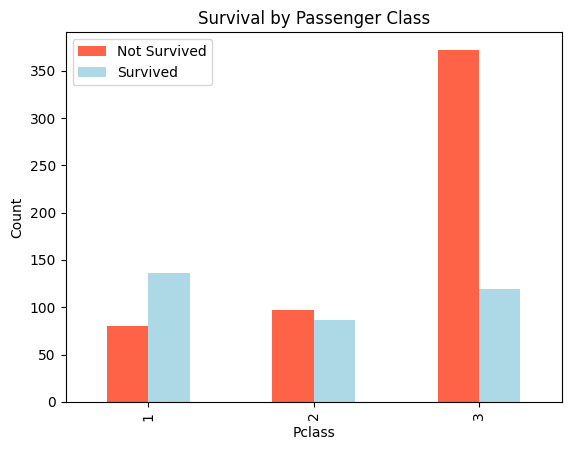

<Figure size 600x400 with 0 Axes>

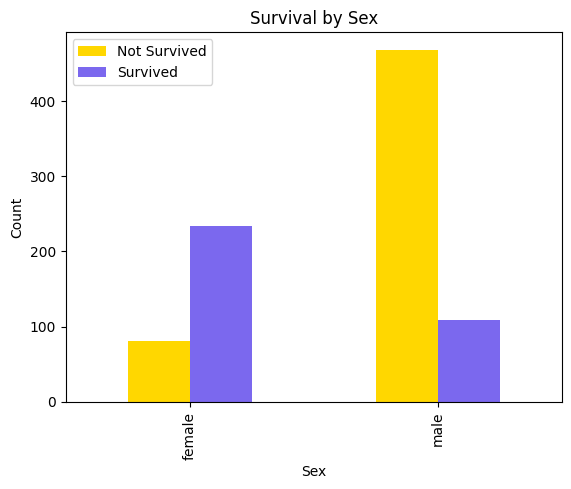

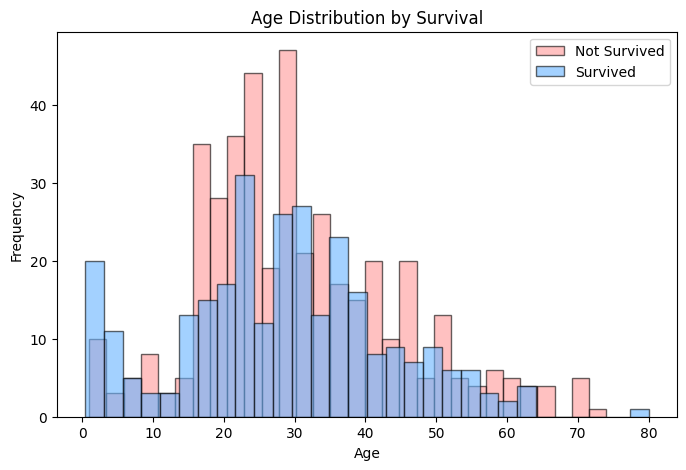

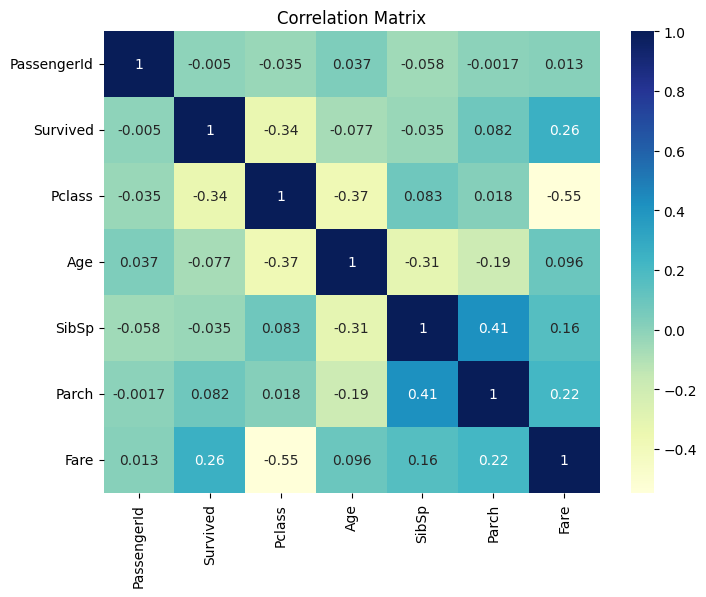

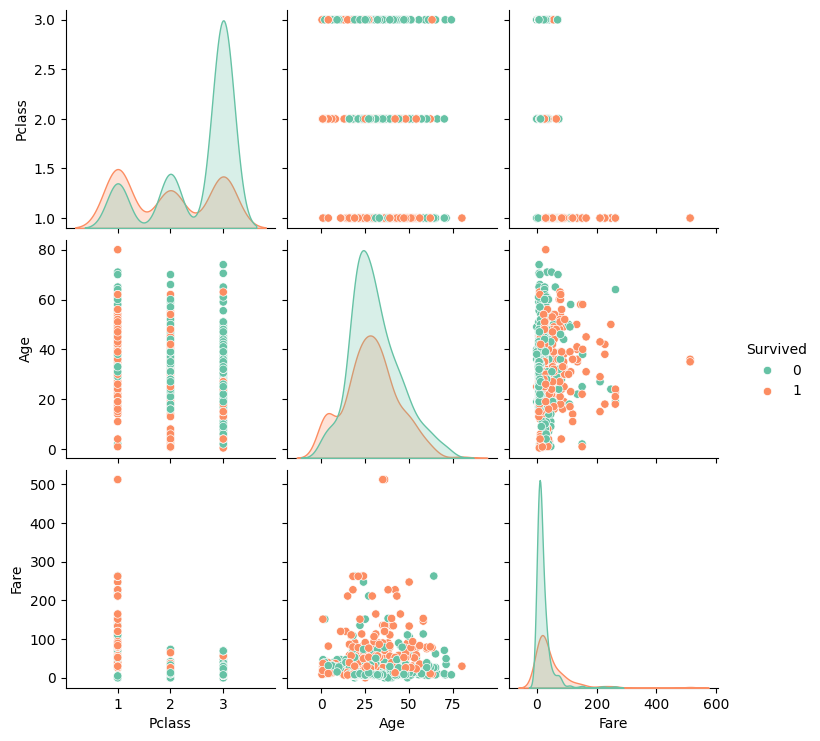

In [1]:
#Prajwal Srivastava
#Week 4 Assignment

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

titanic.shape
titanic.info()
titanic.describe()

missing_values = titanic.isnull().sum()
missing_percent = (missing_values / len(titanic)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0]

sns.set_palette('Pastel1')
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='Greys', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(titanic['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(titanic['Fare'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(titanic['Fare'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Fare Boxplot')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(8, 5))
colors = ['lightblue', 'lightpink', 'lightyellow']
titanic.boxplot(column='Age', by='Pclass', patch_artist=True, boxprops=dict(color='black'),
                medianprops=dict(color='red'))
plt.title('Age by Passenger Class')
plt.suptitle('')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(6, 4))
titanic['Survived'].value_counts().plot(kind='bar', color=['salmon', 'lightseagreen'])
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

plt.figure(figsize=(6, 4))
pd.crosstab(titanic['Pclass'], titanic['Survived']).plot(kind='bar', stacked=False, color=['tomato', 'lightblue'])
plt.title('Survival by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

plt.figure(figsize=(6, 4))
pd.crosstab(titanic['Sex'], titanic['Survived']).plot(kind='bar', stacked=False, color=['gold', 'mediumslateblue'])
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

plt.figure(figsize=(8, 5))
colors = ['#FF9999', '#66B3FF']
for i in [0, 1]:
    plt.hist(titanic[titanic['Survived'] == i]['Age'].dropna(), bins=30, alpha=0.6,
             label='Survived' if i==1 else 'Not Survived', color=colors[i], edgecolor='black')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

sns.set_palette('Set2')
sns.pairplot(titanic[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', height=2.5)
plt.show()
